<a href="https://colab.research.google.com/github/DiegoCorona/Proyecto_BEDU_Modulo4_An-lisis_de_Datos_con_Python/blob/main/Proyecto_Modulo4_An%C3%A1lisis_de_Datos_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudio de Mercado en las aplicaciones móviles.**

Colaboradores:

* Carlos Sebastián Madrigal Rodríguez.
* Diego Armando Morales Corona.
* Carlos Rodríguez Tenorio.
* José David Vázquez Rojas

## **Contexto y preguntas clave.**

En el proyecto anterior [_(Modelo de predicción de ejercicios con mancuernas)_](https://github.com/DiegoCorona/Proyecto-BEDU-Procesamiento-de-datos-con-Python), se planteó la realización de un modelo con el cual, dados valores de sensores, se pudieran predecir si un ejercicio con mancuerna se realizaba de manera correcta o se cometía alguno de los errores más comunes. 

Conseguido esto se enviaron los resultados al equipo de Desarrollo Web para constuir una aplicación móvil con la cual los usuarios puedan tener retroalimentación acerca de los sets de ejercicio realizados en casa.

Esta necesidad de crear una aplicación web deriva en otros problemas a resolver y/o analizar para estudiar el éxito en la aceptación de los usuarios de esta App, el siguiente paso fue analizar el mercado de aplicaciones móviles con el propósito de resolver las siguientes preguntas clave:

* ¿En qué categoría es más conveniente colocar nuestra app para que sea exitosa?
* ¿Es mejor colocarla como app gratuita o como app de cobro?
* ¿Existe relación entre la cantidad de actualizaciones y el rating de una app?
* ¿Es posible predecir si una app será exitosa o no con base en los datos del dataset?
* ¿Qué palabras son las más utilizadas al nombrar una app?

De esta forma se busca conocer cómo es conveniente posicionar la aplicación móvil que monitoree los movimientos de los usuarios al ejercitarse con mancuernas en un mercado de 9 millones de apps que se encuentran en la Play Store. 

El presente proyecto busca estudiar la actualidad del mercado de las aplicaciones web, construir un modelo de predicción del nivel de éxito de una aplicación Web y, dado esto, estudiar el impacto de nuevas Apps en el mercado dadas sus características.


## **Acerca de los datos**

Los datos utilizados para este proyecto son una combinación de dos fuentes:

1. [DataSource.AI](https://www.datasource.ai/es/home/data-science-competitions-for-startups/prediciendo-el-rating-de-las-aplicaciones-en-google-play-store), que lanzá competencias constantemente enfocadas a Machine Learning propuso predecir el exito de Apps de Play Store, pero dividido solamente en dos categorías (exitosa y no exitosa).

2. [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps), con su variedad de datasets para el desarrollo de Machine Learning, nos aportó una base de datos muy parecida a la de _DataSource.AI_, con la peculiaridad de tener los ratings en un valor númerico, que posteriormente decodificamos.

La base de datos cuenta con las siguientes variables:

- _App:_ El nombre de aplicación Web.
- _Category:_ Categoría general a la que pertenece la aplicación en el mercado.
- _Rating:_ Calificación dada por los usuarios.
- _Reviews:_ Número de usuarios que calificaron la App.
- _Size:_ Tamaño de la aplicación móvil.
- _Installs:_ Intalaciones mínimas estimadas de la aplicación.
- _Type:_ Variable categórica que indica si la aplicación es gratuita (Free) o de paga (Paid).
- _Price:_ En caso de ser de paga, el precio por el uso de la App.
- _Content Rating:_ Clasificación del contenido de la aplicación.
- _Genres:_ Géneros específicos de la aplicación.
- _Last Updated:_ Fecha de la última actualización hecha por los desarrolladores.
- _Current Ver:_ Versión de la aplicación.
- _Android Ver:_ Versión de Android mínima con la que es compatible la aplicación.

## **Limpieza de los Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Primero importamos las paqueterías que vamos a utilizar a lo largo de la mayoría de la limpieza y el análisis. También importamos y leemos el dataset.


In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.max_columns', 160)
pd.set_option('display.max_rows', 160)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/googleplaystore.csv')
#Observar los datos.
(pd.concat([df.head(3), df.tail(3)], axis=0, ignore_index=True))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Parkinson Exercices FR,MEDICAL,nan,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
4,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
5,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
print('-'*100)
print(df.dtypes)
print('-'*100)
print('Tamaño: ', df.shape)

----------------------------------------------------------------------------------------------------
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
----------------------------------------------------------------------------------------------------
Tamaño:  (10841, 13)


Para el modelo la variable objetivo será el _Rating_ de la aplicación dada por los usuarios. Aplicando la función _head()_ y _tail()_ notamos la presencia de valores **Nan** en esta columna. 

Notamos otros problemas con el tipo de datos en las variable, por ejemplo, la variable _Size_, que debería tener un valor númerico, tiene un string que representa Mb en algunos registros y en otros representa Kb. La variable _Installs_ contiene carácteres que deben ser procesados. La variable _Genres_ contiene strings que pueden complicar de una manera el análisis, ya que describen de manera muy específica cada producto, entre otros problemas más con la base de datos.

### Explorando y modificando.

La limpieza de los datos en una de las partes más importantes dentro de un proyecto, ya que tener datos sucios dificultan el estudio de las variables y algunas veces pueden llevar a conclusiones erróneas. La primera variable a limpiar será _Reviews_, donde basicamente solo se hace cambio a tipo _numeric_ y borramos una fila con errores de recolección de información.

In [ ]:
df = df.drop([10472],axis=0)
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Respecto a la variable _Size_, dado que contiene caracteres especiales que representan diferentes métricas, se deben realizar conversiones para tener los datos en un solo formato (en este caso el tamaño de la aplicación en Mb).


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Se utilizan algunas técnicas de [_Regex_](https://es.wikipedia.org/wiki/Expresi%C3%B3n_regular) para dividir el dataset en aquellos que tienen el tamaño en Kb para convertir estos regsitros en específico a su equivalencia en Mb

In [ ]:
df_kb = df[df['Size'].str.contains(r"k", regex=True, )]
df_kb["Size"] = df_kb["Size"].str.extract(r'([0-9]+)')
df_kb['Size'] = pd.to_numeric(df_kb['Size'])
df_kb['Size'] = df_kb['Size']/1024;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

En la parte restante del dataset no quedamos con aquellos que estan medidos en Mb, quitamos los caracteres que causan problemas y lo convertimos a formato númerico.

In [ ]:
df_Mb = df[df['Size'].str.contains(r"M", regex=True, )]
df_Mb["Size"] = df_Mb["Size"].str.extract(r'([0-9]+.?[0-9]+)')
df_Mb['Size'] = pd.to_numeric(df_Mb['Size'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Dado que la base de datos es pequeña (poco más de 10,000 registros), aplicamos un ciclo _for_ para modificar la variable _Size_ delñ dataset original. Y con los regsitros que no contienen información númerica los sustituimos por un valor **Nan**

In [ ]:
for index in df.index:
  if index in df_kb.index:
    df.loc[index, 'Size'] = df_kb.loc[index, 'Size']
  elif index in df_Mb.index:
    df.loc[index, 'Size'] = df_Mb.loc[index, 'Size']
  else:
    df.loc[index, 'Size'] = df.loc[index, 'Size']

Y ahora la variable Size ya es un valor númerico.

In [ ]:
df['Size'] = df['Size'].replace({'Varies with device': None})
df['Size'] = pd.to_numeric(df['Size'], errors= 'coerce')

Para la variable _Installs_ solamente ocupamos la función _replace_ para quitar los caracteres especiales y quedarnos solo con el valor númerico.

In [ ]:
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = pd.to_numeric(df['Installs'], errors= 'coerce')

La columna _Type_ es categoríca binaria, por lo que la separamos en dos columnas donde el valor es solo cero o uno dependiendo si la App es de paga o no lo es.

In [ ]:
df = pd.get_dummies(df, columns= ['Type'])

La columna _Price_ solo presenta el caracter especial "$", por lo que solo hay que omitirlo y convertir la variable a valor númerico.

In [ ]:
df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors= 'coerce')

De la variable que contiene la fecha de la ultima actualización, no quedamos con el año, para utilizar esta variable posteriormente.

In [ ]:
df['Last_year_updated'] = df['Last Updated'].str.extract(r'(\b[0-9]+$)')
df['Last_year_updated'] = pd.to_numeric(df['Last_year_updated'])

Borramos la variable _Genres_ ya que es una variable muy específica para cada aplicación

In [ ]:
df = df.drop(columns= ['Genres'])

Reordenamos las columnas y nos queda este resultado.

In [ ]:
df = df.reindex(columns=['App', 'Category',  'Reviews', 'Size', 'Installs', 'Type_Free', 'Type_Paid', 'Price',
       'Content Rating', 'Last Updated', 'Last_year_updated', 'Current Ver', 'Android Ver', 'Rating' ])
df.head()

,App,Category,Reviews,Size,Installs,Type_Free,Type_Paid,Price,Content Rating,Last Updated,Last_year_updated,Current Ver,Android Ver,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.000,10000,1,0,0.000,Everyone,"January 7, 2018",2018,1.0.0,4.0.3 and up,4.100
1,Coloring book moana,ART_AND_DESIGN,967,14.000,500000,1,0,0.000,Everyone,"January 15, 2018",2018,2.0.0,4.0.3 and up,3.900
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.700,5000000,1,0,0.000,Everyone,"August 1, 2018",2018,1.2.4,4.0.3 and up,4.700
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.000,50000000,1,0,0.000,Teen,"June 8, 2018",2018,Varies with device,4.2 and up,4.500
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.800,100000,1,0,0.000,Everyone,"June 20, 2018",2018,1.1,4.4 and up,4.300


### Limpiando los _Nan's_

Primero debemos ver que variables continen valores vacíos.

In [ ]:
df.isna().sum()

App                     0
Category                0
Reviews                 0
Size                 1695
Installs                0
Type_Free               0
Type_Paid               0
Price                   0
Content Rating          0
Last Updated            0
Last_year_updated       0
Current Ver             8
Android Ver             2
Rating               1474
dtype: int64

Para rellenar los Nan en la variable _Size_ creamos un dataset auxiliar que contenga la mediana del tamaño de la aplicación por categória a que pertenece.

Se utiliza la mediana ya que es menos propensa a verse afecatada por valores atípicos que pudieran haber en esta columna.

In [ ]:
info = df.groupby('Category')['Size'].median().to_frame()
info.head()

,Size
Category,
ART_AND_DESIGN,8.950
AUTO_AND_VEHICLES,16.000
BEAUTY,9.200
BOOKS_AND_REFERENCE,7.400
BUSINESS,9.050


Y solamente rellenamos esos Nan.

In [ ]:
for index in df.index:
  if np.isnan(df.loc[index, 'Size']) == True:
    aux = df.loc[index, 'Category']
    df.loc[index, 'Size'] = info.loc[aux, 'Size']

In [ ]:
df.isna().sum()

App                     0
Category                0
Reviews                 0
Size                    0
Installs                0
Type_Free               0
Type_Paid               0
Price                   0
Content Rating          0
Last Updated            0
Last_year_updated       0
Current Ver             8
Android Ver             2
Rating               1474
dtype: int64

Para las columnas _Current Ver_ y _Android Ver_ solamente sustituimos los Nan por 'No_info'.

In [ ]:
df['Current Ver'] = df['Current Ver'].replace({None: 'No_info'})
df['Android Ver'] = df['Android Ver'].replace({None: 'No_info'})

Solo hay Nan en la variable objetivo, y pra esta había dos opciones:

1. Utilizar regresión lineal con las demás variables para tratar de estimar estos Ratigs.

2. Borrar estos registros.

Se trato de ajustar un modelo de regresión lineal pero el rendimiento fue muy pobre, por lo que se decidio omitir estos registros.

In [ ]:
df.isna().sum()

App                     0
Category                0
Reviews                 0
Size                    0
Installs                0
Type_Free               0
Type_Paid               0
Price                   0
Content Rating          0
Last Updated            0
Last_year_updated       0
Current Ver             0
Android Ver             0
Rating               1474
dtype: int64

In [ ]:
df = df.dropna(subset = ['Rating'])

Y nuestro dataset esta limpio de Nan, cabe mencionar que el tamaño del dataset es de 9,366 registros en 15 columnas.

In [ ]:
print('Tamaño final del dataset: ', df.shape)
print('-'*100)
print("Cantidad de Nan's presentes en el dataset: ")
df.isna().sum()

Tamaño final del dataset:  (9366, 14)
----------------------------------------------------------------------------------------------------
Cantidad de Nan's presentes en el dataset: 


App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type_Free            0
Type_Paid            0
Price                0
Content Rating       0
Last Updated         0
Last_year_updated    0
Current Ver          0
Android Ver          0
Rating               0
dtype: int64

Por último paso para esta limpieza, definimos una nueva variable llamada 'Exito_app', en la que agruparemos en Rating de la App en algunos de los dos grupos definidos de la siguiente manera, de acuerdo al rating obtenido:

- "0" significa que es una aplicación de mala a regular.
- "1" significa que es una buena aplicación.

Lo anterior para convertir nuestro problema, que en principio era regresión a un problema de clasificación. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


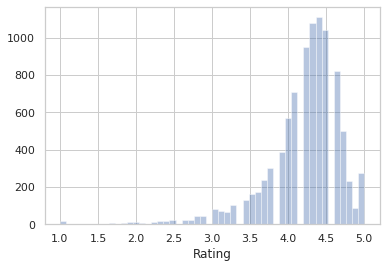

In [ ]:
sns.distplot(df['Rating'], kde = False, norm_hist= False)

In [ ]:
df['Exito_app'] = [0 if df.loc[index , 'Rating'] <= 4 else 1 for index in df.index]

print(df['Exito_app'].value_counts())
print('-'*100)
df['Exito_app'].value_counts()/len(df['Exito_app'])

1    6800
0    2566
Name: Exito_app, dtype: int64
----------------------------------------------------------------------------------------------------


1   0.726
0   0.274
Name: Exito_app, dtype: float64

In [ ]:
df.columns = ['App', 'Categoria', 'Reviews', 'Tamanio_MB', 'Instalaciones_minimas_estimadas', 'App_gratuita', 'App_pago', 'Precio', 'Rating_del_contenido', 
              'Ultimo_updated', 'Anio_ultimo_updated', 'Version_actual', 'Version_Android', 'Rating', 'Exito_app']

In [ ]:
df.head()

,App,Categoria,Reviews,Tamanio_MB,Instalaciones_minimas_estimadas,App_gratuita,App_pago,Precio,Rating_del_contenido,Ultimo_updated,Anio_ultimo_updated,Version_actual,Version_Android,Rating,Exito_app
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.000,10000,1,0,0.000,Everyone,"January 7, 2018",2018,1.0.0,4.0.3 and up,4.100,1
1,Coloring book moana,ART_AND_DESIGN,967,14.000,500000,1,0,0.000,Everyone,"January 15, 2018",2018,2.0.0,4.0.3 and up,3.900,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.700,5000000,1,0,0.000,Everyone,"August 1, 2018",2018,1.2.4,4.0.3 and up,4.700,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25.000,50000000,1,0,0.000,Teen,"June 8, 2018",2018,Varies with device,4.2 and up,4.500,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.800,100000,1,0,0.000,Everyone,"June 20, 2018",2018,1.1,4.4 and up,4.300,1


In [ ]:
df.to_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv')

## **Analisis exploratorio de los datos.**

In [ ]:
df_limpio = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col= 0)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### **Estimados de localización y variabilidad.**

Estos estimados nos dan una idea del lugar donde se centran nuestros datos, esto no puede resolver algunas preguntas, tales como: ¿Tengo datos sesgados hacía algún lugar? ¿Tengo presencia de datos atípicos?. Es importante tener en cuenta que estos estimados solo se pueden obtener de las variable númericas presnetes en nuestro dataset.

In [ ]:
data_numerica = df_limpio[['Reviews', 'Tamanio_MB', 'Instalaciones_minimas_estimadas', 'Precio', 'Rating']]
data_numerica.describe()

,Reviews,Tamanio_MB,Instalaciones_minimas_estimadas,Precio,Rating
count,9366.000,9366.000,9366.000,9366.000,9366.000
mean,514049.837,21.368,17897443.726,0.961,4.192
std,3144042.127,21.898,91238217.377,15.817,0.515
min,1.000,0.008,1.000,0.000,1.000
25%,186.250,6.000,10000.000,0.000,4.000
50%,5930.500,13.000,500000.000,0.000,4.300
75%,81532.750,29.000,5000000.000,0.000,4.500
max,78158306.000,100.000,1000000000.000,400.000,5.000


Con la tabla anterior podemos darnos una idea de la localización de nuestros datos y podemos hacer algunas inferencias al respecto:

* El número de **reviews** de la aplicaciones esta sesgada, ya que la media (514,049.8) y la mediana (5,930.5) difieren en gran medida, lo podemos notar también comparando la mediana con el percentil al 75%, esto habla de la gran diversidad en el uso de aplicaciones y la preferencia de la mayoría de los usuarios por el uso de algunas en particular. La desviación estándar en esta varible (3144042.127) nos indica que la dispersión de los datos es muy grande, es decir, el número de personas que dejan una review es muy variante de aplicación en aplicación.

* Respecto al **tamaño (en MB)**, las aplicaciones no tienen un peso de más de 100 Mb, aunque hay que notar el 'salto' que existe entre el percentil al 75% (29 Mb) y el tamaño de la aplicación más pesada en el dataset misma que pueda provocar un poco de sesgo en esta variable. 

* Las **instalaciones mínimas estimadas** por aplicación también cuentan con un gran sesgo (podrá verse en la sección de las distribuciones), contamos con aplicaciones que solo cuentan con una sola instalación y también contamos con aplicaciones que cuentan con 1,000 millones de instalaciones (podría ser el caso de aplicaciones famosas como Facebook o alguna otra red social), el rango intercuatilico en esta variable es de 4,990,000, esto no habla de gran dispersión en los datos, esto de ve en la desviación estándar (91238217.377), estos datos son extremadamente dispersos, y muestran la diversidad de interacción de lo usuarios con ciertas aplicaciones y podría interpretarse también que el mercado esta un tanto dominado por las apliaciones móviles más famosas.

* El **precio** de las aplicaciones también es sesgado, si bien es cierto que abundan en gran medida las aplicaciones que son gratuitas, las aplicaciónes que son de paga provovan un ligero sesgo. Se puede notar al checar el percentil al 75% (cero) y el valor máximo ($40).

* El **rating** de la aplicaciones es una variable númerica que puede ir desde cero hasta un 5 de calificación, en donde, mientras es número sea más alto, mejor recepción tiene entre los usuarios. Esta variable aparentemente no se encuentra sesgada ya que la media (4.192) y la mediana (4.3) se encuentran muy cercanas. El rango intercuartilico (0.5), nos indica poca dispersión de los datos, esto podría haberse dado por hecho dada la natualeza de la misma variable.

Las anteriores son supocisiones intuitivas observando solo las medidas de localización presentadas en las variables, pero podrán verse más claro en la sección de la vizualización.

### **Distribuciones de la variables.**

A continuación se presentan los histogramas de nuestras variables númericas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del rating.')

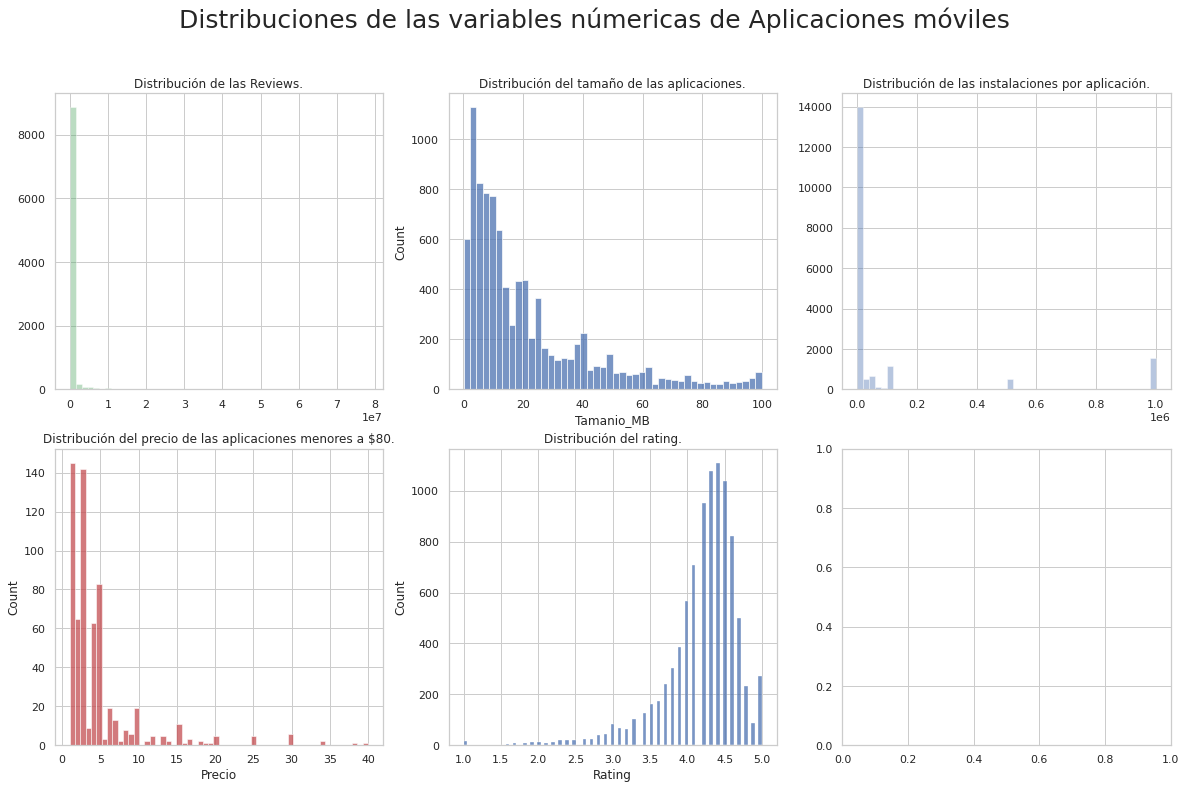

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribuciones de las variables númericas de Aplicaciones móviles', size = 25)

# Reviews
sns.distplot(ax=axes[0, 0], x= data_numerica['Reviews'], kde = False, norm_hist= False, color  = 'g');
axes[0, 0].set_title('Distribución de las Reviews.')

# Tamaño (Mb)
sns.histplot(ax=axes[0, 1], x= data_numerica['Tamanio_MB'])
axes[0, 1].set_title('Distribución del tamaño de las aplicaciones.')

# Instalaciones por aplicación
sns.distplot(ax=axes[0, 2], x= data_numerica[(data_numerica['Instalaciones_minimas_estimadas'] > np.quantile(data_numerica['Instalaciones_minimas_estimadas'], 0.25)) & (data_numerica['Instalaciones_minimas_estimadas'] < np.quantile(data_numerica['Instalaciones_minimas_estimadas'], 0.75))],
             kde = False, norm_hist= False);
axes[0, 2].set_title('Distribución de las instalaciones por aplicación.')

# Precio
sns.histplot(ax=axes[1, 0], x= data_numerica[(data_numerica['Precio'] > 0) & (data_numerica['Precio'] < 79)]['Precio'], color= 'r')
axes[1, 0].set_title('Distribución del precio de las aplicaciones menores a $80.')

# Rating
sns.histplot(ax=axes[1, 1], x= data_numerica['Rating'])
axes[1, 1].set_title('Distribución del rating.')


Podemos ver que muchas de la variables se encuentran extremadamente sesgadas o la distribución de los datos se encuntran distribuida en un rango de valores muy peuqeño, también hay presencia de datos atípicos.

A continuación calculamos el sesgo y kurtosis presente en nuestros datos. Podemos notar lo siguiente:

* Los valores del número de _reviews_ se concentran en la parte izquierda alrededor de la media, mientras que la kurtosis, al dar un valor muy grande positivo no indica que estos valores se encuentran concentrados en un rango pequeño de valores. 

* Repecto al _tamaño_ de la aplicaciones, presenta una pequeña asimetría positiva, los datos se encuntran concentrados a la izquierda de la media, mientras que existe una gran concentración de datos, esto dado por la kurtosis positiva.

* Las _instalaciones_ tienen un comportamiento muy parecido al número de reviews, se cuenta con una asímetria positiva y una alta concentración de datos, hay aplicaciones que cuentan con un número de instalaciones numerosas, son las que provocan el sesgo en los datos.

* El _precio_ de las aplicaciones presenta un comportamiento similar a las variables anteriores, los valores se concentran en un rango pequeño (a comparación del rango total de valores) y a la izquierda de la media, esto derivado de la gran cantidad de aplicaciones que son gratuitas, es decir, un precio de cero.

* El _rating_ de las aplicaciones, presenta una asimetría negativa, esto es, la mayor concentración de los datos se encuentra a la derecha de la media, puede deberse a que la mayoría de los ratings 'jalan' la media hacia la derecha. La kurtosis muestra que hay gran concentración de datos en un rago pequeño, derivado de la naturaleza de la variable, al tener un rango entre 0 y 5. 

In [ ]:
for name in data_numerica.columns:
  print('-'*80)
  print('Sesgo y Kurtosis para la variable', name)
  print(' '*5, 'Sesgo: ', stats.skew(data_numerica[name]))
  print(' '*5, 'Kurtosis: ',stats.kurtosis(data_numerica[name]))

--------------------------------------------------------------------------------
Sesgo y Kurtosis para la variable Reviews
      Sesgo:  15.305403747724117
      Kurtosis:  294.93942359305316
--------------------------------------------------------------------------------
Sesgo y Kurtosis para la variable Tamanio_MB
      Sesgo:  1.6415273595698707
      Kurtosis:  2.2774534706342404
--------------------------------------------------------------------------------
Sesgo y Kurtosis para la variable Instalaciones_minimas_estimadas
      Sesgo:  8.88690179519588
      Kurtosis:  86.17888526544974
--------------------------------------------------------------------------------
Sesgo y Kurtosis para la variable Precio
      Sesgo:  24.39835681793893
      Kurtosis:  604.2543832830169
--------------------------------------------------------------------------------
Sesgo y Kurtosis para la variable Rating
      Sesgo:  -1.8493988795840668
      Kurtosis:  5.78319465669863


### **Correlaciones, regresión lineal simple y técnicas de evaluación de modelos**

Siguiendo con el uso de las variables númericas presentes en nuestro dataset, es interesante saber si podemos aplicar regresión lineal simple para poder explicar una variable con respecto a otra (o varías).

Para esto, primeramente debemos observar las correlariones en nuestras variables, esto para poder elegir ciertas varibles a utilizar.


Con la siguiente figura podemos notar las relaciones existente entre las variables númericas del dataset. La mayor parte de las correlaciones  son cercacnas a cero, esto es que no existe una relación lineal entre estas variables, esto nos dice que, en un modelo de regresión lineal, es muy díficil poder explicar una variable con respecto a otra (con las que no tienen correlación). La única excepción en el dataset es la relación que existe entre las **Instalaciones_minimas_estimadas** y el número de **Reviews**, estas dos variables tienen una correlación de 0.64, si bien es cierto que este valor no es extremadamente grande (ya que se puede considerar una correlación fuerte con un valor ± 0.7), hay una pequeña relación entre estas variables. 

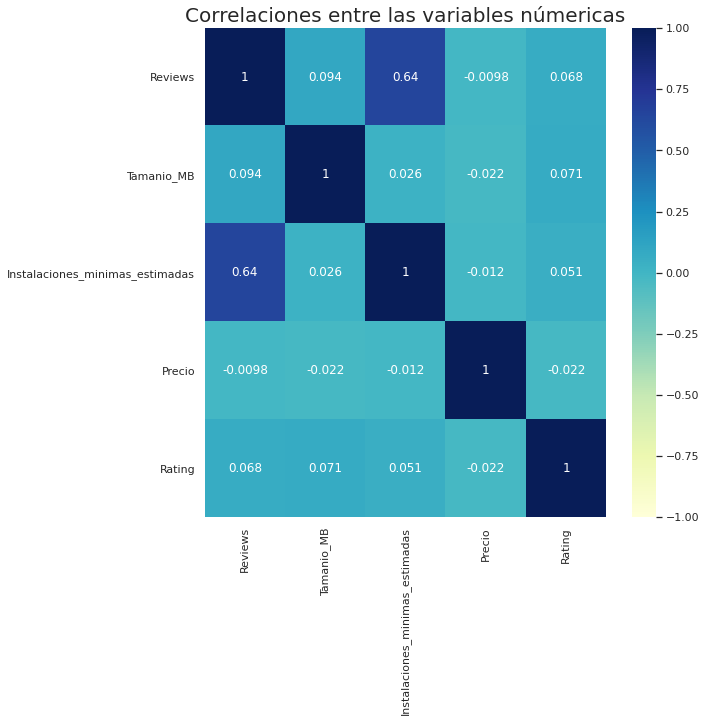

In [ ]:
import seaborn as sns

plt.figure(figsize= (9,9))
ax = sns.heatmap(data_numerica.corr(), annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
ax.set_title('Correlaciones entre las variables númericas', fontsize = 20);

El valor númerico anterior no se puede apreciar vizualmente en los diagramas de dispresión presentados en la siguiente gráfica- De hecho, podemos apreciar que no se ve una aparente relación lineal entre los pares de variables. 

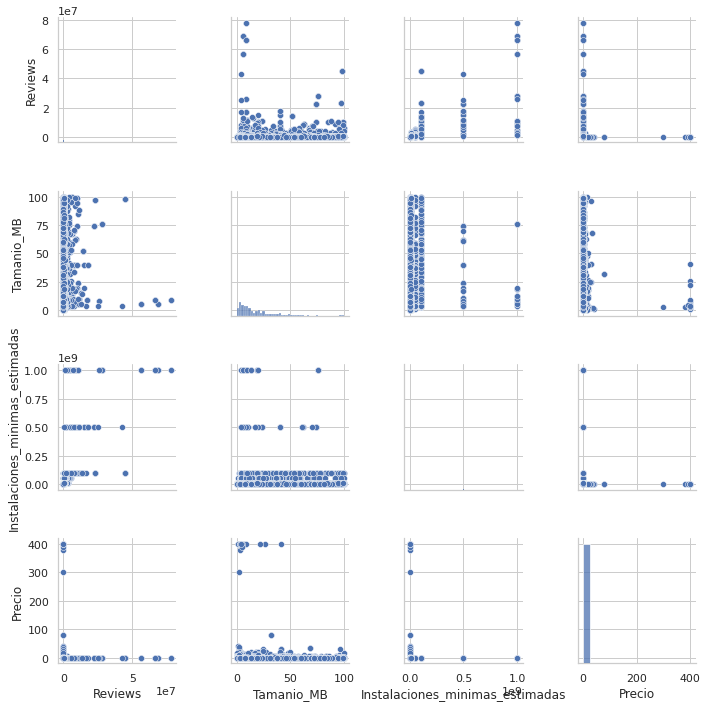

In [ ]:
ax = sns.pairplot(data_numerica.drop(columns = ['Rating']))

En esta ocación haremos caso al valor de correlación y ajustaremos una regresión lineal simple tomando en cuenta solamente las variables que presentaban alguna relación entre ellas.

La variable dependiente será el número de _reviews_ presentados por aplicación mientras que la variable predictora será el _número de Instalaciones estimadas_.

**Utilizamos *train_test_split* para dividir nuestro dataset en conjuntos de _entrenamiento y prueba_, esto para probar el comportamiento de nuestro modelo en datos nuevos a los vistos en el entrenamiento.**

Para el modelo de regresión lineal utilizaremos el paquete **stastmodels**, la ventaja con esta paquetería, al menos en este caso, es que nos ofrece un resumen del modelo, así como la significancia de las variables.


In [ ]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(data_numerica.drop(columns = ['Rating']), data_numerica['Rating'], 
                                                    test_size = 0.25, random_state = 20)
linreg = smf.ols(formula = 'Reviews ~ Instalaciones_minimas_estimadas', data = X_train).fit(random_state = 12)
linreg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reviews   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     4774.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        18:48:25   Log-Likelihood:            -1.1329e+05
No. Observations:                7024   AIC:                         2.266e+05
Df Residuals:                    7022   BIC:                         2.266e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.273e+05   2.97e+04      4.278      0.000     6.9e+04    1.86e+05
Instalaciones_minimas_estimadas     0.0212      0.000     69.098      0.000       0.021       0.022
==============================================================================
Omnibus:                    11573.948   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16600201.475
Skew:                          10.703   Prob(JB):                         0.00
Kurtosis:                     240.197   Cond. No.                     9.87e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Con este modelo podemos notar que tanto el intercepto y las _Instalaciones_minimas_estimadas_ son significantes, ya que cuentan con un p-valor muy cercano a cero (El juego de hipótesis es: *H_0: ß_i = 0 vs H_1: ß_i ≠ 0*). Tenemos una R^2 en el set de entrenamiento de 0.405, lo cual indica que la varianza explicada en el set de entrenamiento con nuestro modelo solo es de poco menos de 41%.

Un punto a considerar es el valor del intercepto, ya que es gigantesco y tiene un error estándar excesivamente grande, por lo que ajusteremos un segundo modelo omitiendo esta variable. Cabe mencionar que el rendimiento de este modelo en el set de prueba fue un poco mejor que en el de entrenamiento, obteniendo una varianza explicada de 43.1%.

In [ ]:
X_test_reg = X_test.drop(columns = ['Reviews'])
y_test_reg = X_test['Reviews']
pred = linreg.predict(X_test_reg)
print('R^2 en el set de prueba: ', r2_score(y_test_reg, pred))

R^2 en el set de prueba:  0.43103188186246433


In [ ]:
linreg_1 = smf.ols(formula = 'Reviews ~ Instalaciones_minimas_estimadas - 1', data = X_train).fit(random_state = 13)
linreg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Reviews   R-squared (uncentered):                   0.419
Model:                            OLS   Adj. R-squared (uncentered):              0.419
Method:                 Least Squares   F-statistic:                              5063.
Date:                Sat, 08 May 2021   Prob (F-statistic):                        0.00
Time:                        18:48:25   Log-Likelihood:                     -1.1330e+05
No. Observations:                7024   AIC:                                  2.266e+05
Df Residuals:                    7023   BIC:                                  2.266e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Instalaciones_minimas_estimadas     0.0215      0.000     71.156      0.000       0.021       0.022
==============================================================================
Omnibus:                    11461.051   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16141643.563
Skew:                          10.481   Prob(JB):                         0.00
Kurtosis:                     236.911   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con esta variación de omitir el intercepto, se obtubo un mejor R^2 en el set de entrenamiento mientras que en el set de prueba descendio un poco. Por lo que podemos decir que el quitar o dejar el intercepto realmente no agrega o quita rendimiento.

In [ ]:
X_test_reg = X_test.drop(columns = ['Reviews'])
y_test_reg = X_test['Reviews']
pred_1 = linreg_1.predict(X_test_reg)
print('R^2 en el set de prueba: ', r2_score(y_test_reg, pred_1))

R^2 en el set de prueba:  0.4302278286198622


Este modelo podria dar una idea de, dadas estimaciones de personas que intalaron una aplicación en específico, ¿Qué cantidad de estas podrían dejar una review?, aunque repetimos, solo sería un estimado por el rendimiento del módelo en sí.] 

###  Regresión Multiple

Ahora, construiremos una regresión multiple con los atributos 'Exito_app', 'App', 'Categoria', 'App_gratuita', 'App_pago', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated', 'Version_actual', 'Version_Android', 'Rating'.  Y como variable objetivo el atributo 'Rating con el fin de entrenar un modelo que pueda predecir el rating de las aplicaciones

In [ ]:
from sklearn.linear_model import LinearRegression
X = df_limpio.drop(columns=['Exito_app', 'App', 'Categoria', 'App_gratuita', 'App_pago', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated', 'Version_actual', 'Version_Android', 'Rating']).values
y = df_limpio['Rating'].values
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)) 

[[4.24 4.2 ]
 [4.17 4.2 ]
 [4.17 4.3 ]
 ...
 [4.3  4.5 ]
 [4.26 4.6 ]
 [4.17 4.4 ]]


Observamos que nuestro modelo fue entrenado decentemente con resultados no óptimos pero si deseables

In [ ]:
df = pd.DataFrame({'Ratings Actuales': y_test, 'Ratings predecidos': y_pred})
df

,Ratings Actuales,Ratings predecidos
0,4.200,4.239
1,4.200,4.165
2,4.300,4.175
3,4.700,4.210
4,3.700,4.173
...,...,...
6552,4.500,4.199
6553,4.400,4.384
6554,4.500,4.299
6555,4.600,4.256


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.35824840221757104
Mean Squared Error: 0.26404532332752934
Root Mean Squared Error: 0.5138534064570647


Finalmente obtenemos un error cuadrático promedio de .2640 lo que en perspectiva podemos considerar un buen resultado esperado

### **Distribuciones muestreales**

En esta sección se buscó identificar si las medidas estadísticas obtenidas son realmente representativas de la población. Por lo cual se recurrió a la técnica de boostrap con el objetivo de aprovechar los datos con los que contamos y verificar si las medidas estadísticas son precisas. De esta forma se generó un histograma para obtener la media estadística de un gran número de remuestros.

Se realizó el bootstrap para la columna de Rating; considerando reposición en la toma de la muestra, tomando 50 elementos para cada muestra (n=50) y repitiendo el proceso 100,000 veces.

In [ ]:
ratings_para_bootstrap = df_limpio['Rating']

means = []

for i in range(100_000):
    sample = ratings_para_bootstrap.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


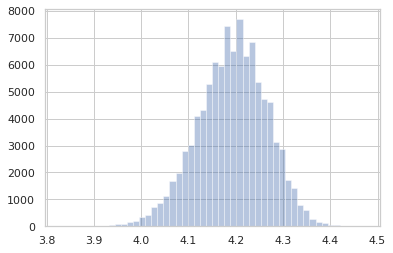

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
print(f' La media obtenida es de: {serie_means.mean()}')

 La media obtenida es de: 4.191852919999944


En comparación con los datos originales en donde la media de los datos con respecto al rating fue de 4.192, a través del bootstrap se obtuvo el mismo valor como media de las medias; por lo cual se puede concluir que el teorema del límite central se cumple, ya que la distribución de las medias sigue aproximadamente una distribución normal, como se puede observar en el histograma graficado anteriormente.

Posteriormente se obtuvo el error estándar, el cual es la desviación estándar de nuestra serie de medidas estadísticas:

In [ ]:
print(f'Error estándar: {serie_means.std()}')

Error estándar: 0.07309931738789553


Para la interpretación de dicho valor se identificó el rango y la distribución de los datos:

In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 3.8280000000000007
Valor máximo: 4.4719999999999995
Rango: 0.6439999999999988


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


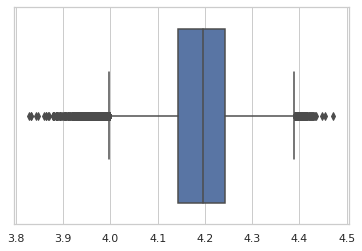

In [ ]:
sns.boxplot(serie_means);

De esta forma, se puede concluir que entre menor es el error estándar, menor variabilidad e incertidumbre existirá con respecto a nuestra medida estadística, en este caso la media. Lo cual se comprobó en los pasos anteriores.

Con los datos obtenidos anteriormente se calculó el intervalo de confianza para cuantificar la incertidumbre que existe en nuestra medida estadística. De esta forma, el intervalo de confianza es el intervalo numérico para asegurar con cierto nivel de seguridad que caerá nuestra nueva medición estadística. En este caso, para el intervalo de confianza del 95% se removieron 2.5% de valores al inicio y al final; se obtuvieron los nuevos valores máximo y mínimo y de esta forma el 95% de los valores quedan en este intervalo:

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

Quedando el intervalo de la siguiente forma:

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {ratings_para_bootstrap.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 4.04 < 4.191757420456978 < 4.3260000000000005


De igual forma se puede visualizar el intervalo de confianza en la gráfica generada anteriormente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


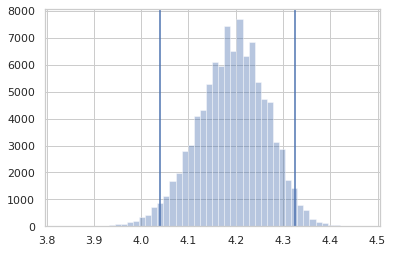

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

Los pasos anteriores se realizaron además para las columna de tamaño de las app. Con lo cual se obtuvieron los siguientes resultados:

In [ ]:
tamano_para_bootstrap = df_limpio['Tamanio_MB']

means = []

for i in range(100_000):
    sample = tamano_para_bootstrap.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


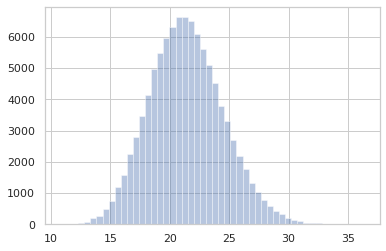

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
print(f' La media obtenida es de: {serie_means.mean()}')

 La media obtenida es de: 21.37736328152324


En comparación con los datos originales en donde la media de los datos con respecto al tamaño fue de 21.368, a través del bootstrap se obtuvo un valor aproximado como media de las medias; por lo cual se puede concluir que el teorema del límite central se cumple, ya que la distribución de las medias sigue aproximadamente una distribución normal, como se puede observar en el histograma graficado anteriormente.

Posteriormente se obtuvo el error estándar, así como el valor mínimo, máximo y rango de los datos:

In [ ]:
print(f'Error estándar: {serie_means.std()}')
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Error estándar: 3.1000365319101215
Valor mínimo: 10.75998046875
Valor máximo: 36.3719375
Rango: 25.61195703125


De esta forma, se puede concluir que entre menor es el error estándar, menor variabilidad e incertidumbre existirá con respecto a nuestra medida estadística, en este caso la media. Lo cual se comprobó en los pasos anteriores.

Finalmente, se obtuvieron los intervalos para el 95% de confianza para asegurar que nuestra medición estadística caerá en dicho intervalo:

Intervalo de 95% confianza de la media: 15.656169140625 < 21.367877975356368 < 27.811999999999998


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


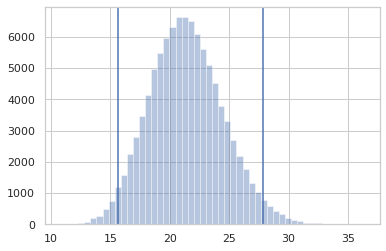

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {tamano_para_bootstrap.mean()} < {limite_superior}')
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);


### **Visualización avanzada.**

Posteriormente, con el objetivo de identificar en qué categoría podría tener una mejor recepción nuestra aplicación móvil, se generó un treemap por rating. De esta forma se agruparon los datos por nombre de la app y con el objetivo de evitar la posible repetición de alguna de ellas se utilizó el método .max(). Después, se desplegaron las columnas de Categoría y Exito_app como se observa en el dataset filtrado con la información que ocuparemos en la construcción del treemap.

In [ ]:
df_grouped = df_limpio.groupby('App')[['Categoria', 'Exito_app']].max()
df_grouped.head()

,Categoria,Exito_app
App,,
+Download 4 Instagram Twitter,SOCIAL,1
- Free Comics - Comic Apps,COMICS,0
.R,TOOLS,1
/u/app,COMMUNICATION,1
058.ba,NEWS_AND_MAGAZINES,1


A nuestro dataset anterior, se agregó una columna adicional llamada count, la cual nos servirá para generar el treemap y realizar el conteo de cuantas aplicaciones fueron exitosas y cuantas no, dentro de cada categoría.

In [ ]:
df_grouped['count'] = 1

Al inicio se tuvo que actualiza plotly con el siguiente código con el propósito de poder visualizar los treemaps generados:

In [ ]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
import plotly.express as px

In [ ]:
fig = px.treemap(df_grouped, path = ['Categoria', 'Exito_app'], values='count')
fig.show()


Del treemap anterior se concluyó lo siguiente:
- Las categoría con más aplicaciones móviles es FAMILY, la cual presentó 1143 aplicaciones exitosas y 505 no exitosas. Lo anterior se puede expresar de la siguiente forma: El 69% de las aplicaciones móviles dentro de la categoría FAMILY son exitosas.
- Las categorías con más aplicaciones móviles, despues de FAMILY, son GAME, TOOLS, FINANCE, LIFESTYLE y PRODUCTIVITY.
- Del treemap se observa el sesgo identificado en secciones anteriores, en donde la mayoría de las aplicaciones por categoría son exitosas; por lo cual una clasificación diferente sería de mayor utilidad en el análisis, considerando una escala de 0,1 o 2; en donde:

"0" significa que es una aplicación de mala a regular.
"1" significa que es una buena aplicación.
"2" significa que es una excelente aplicación.


Por otro lado, se identificó que el enfoque de la aplicación podría determinar la categoría en la cual colocarla: 
- Si se decide realizar una aplicación en la cual los usuarios imiten los movimientos de atletas o la rutina de personajes famosos, la aplicación podría incorporarse bajo la categoría de GAMES, SPORTS o ENTERTAINMENT; si el enfoque va enfocado en mejorar rutinas de ejercicio o si se decide incorporar en las nuevas apps generadas por los gimnasios, la aplicación podría incluirse dentro de las categorías PRODUCTIVITY, HEALTH AND FITNESS o LIFESTYLE.

Sin embargo, si el enfoque de la aplicación cubre segmentos completos de mercado, en este caso niños, adolescentes y adultos jóvenes, el scope de la aplicación permitiría incorporarla bajo la categoría de FAMILY, en donde podría tener mayor probabilidad de ser éxitosa, como resultado del análisis realizado anteriormente. Por otro lado,  cabe destacar que al existir una mayor cantidad de aplicaciones móviles en esta categoría, el mercado y la demanda son mayores, generando una mayor competencia.

A partir de los resultados anteriores, el treemap se amplió para considerar bajo cada categoría, cual era el precio de cada app que era considerada exitosa o no:

In [ ]:
df_grouped_2 = df_limpio.groupby('App')[['Categoria', 'Exito_app', 'Precio']].max()
df_grouped_2['count'] = 1
df_grouped_2.head()

,Categoria,Exito_app,Precio,count
App,,,,
+Download 4 Instagram Twitter,SOCIAL,1,0.000,1
- Free Comics - Comic Apps,COMICS,0,0.000,1
.R,TOOLS,1,0.000,1
/u/app,COMMUNICATION,1,0.000,1
058.ba,NEWS_AND_MAGAZINES,1,0.000,1


In [ ]:
fig = px.treemap(df_grouped_2, path=['Categoria','Exito_app', 'Precio'], values='count')

fig.show()

Del treemap anterior se observó que dentro las categorías, predominan las aplicaciones gratuitas sin importar que sean exitosas o no. El mejor ejemplo es la categoría FAMILY, en donde el 89% de las aplicaciones exitosas son gratuitas. Lo anterior puede deberse a las siguientes causas: 

- Las aplicaciones gratuitas presentan anuncios o propaganda, evitando el cobro al usuario pero obteniendo ganancias a partir de los cobros a empresas de terceros que buscan obtener clicks, vender productos o generar propaganda para otras aplicaciones o servicios.

- Las aplicaciones aparecen como gratuitas pero incluyen compras in-app; lo cual significa que los usuarios pueden comprar extensiones dentro de la aplicación que desbloquean características adicionales.

- Las aplicaciones aparecen como gratuitas para descarga pero requieren de cobros mensuales o anuales que permiten a los usuarios desbloquear o acceder al contenido dentro de la app.


Por lo anterior, fue posible concluir que la mejor estrategia es colocar la aplicación móvil como gratuita; pero considerando las posibilidades adicionales de anuncios, compras in-app o suscripciones. De esta forma se contabilizará la descarga en la plataforma y las probabilidades de exito aumentarán.

### **Pruebas A/B**

En esta sección nos interesa analizar varios aspectos de nuestros datos, cabe mencionar que hay dos maneras de poder realizar pruebas A/B, una es realizando iteraciones de muetreo para así obtener un p-valor estimado de un prueba de hipótesis en particular, la otra manera es obtener una [_estadística de prueba_](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-test-statistic/) y, a partir de esto, obtener el p-valor dada una distribución de probabilidad. La paquetería **statsmodels** ofrece maneras muy sencillas de contratar pruebas de hipótesis, obteniendo un p-valor considerablemente parecido al obtenido por medio de iteraciones, con la ventaja de ahorrar procesamiento de memoria.

In [ ]:
import statsmodels.api as sm ## Paqueteria para pruebas de hipótesis

Primeramente, aparentemente aquellas aplicaciones que son actualizadas constantemente tienen una mayor calificación de Rating dadas por los usuarios, pero nos interesa saber si esta relación realmente se cumple, probaremos el siguiente juego de hipótesis: 

+ **H_0: P_2018 - P_(2018-i) = 0 vs H_1: P_2018 - P_(2018-i) > 0**

Donde se P_2018 es la proporción de aplicaciones exitosas (Rating mayor a 4.0) donde su última actualización fue en 2018, de manera parecida P_(2018-i) es la proporción de apps exitosas en los años anteriores a 2018. 

En la siguente tabla se puede apreciar que, aparentemente, la proporción de apps exitosas respecto a su ultimo años de actualización es creciente, es decir, 'Si actualizó mi app constantemente a más cantidad de usuarios les va a gustar', pero vamos a probar esto.

Como nota, omitiremos el año 2010, ya que solo se trata de una sola aplicación en esta categoría.

In [ ]:
info = df_limpio[df_limpio['Anio_ultimo_updated']>2010].groupby('Anio_ultimo_updated')[['Categoria', 'Exito_app']].mean()
info.columns = ['Proporción de apps exitosas por último año de actualización']
info

,Proporción de apps exitosas por último año de actualización
Anio_ultimo_updated,
2011,0.467
2012,0.476
2013,0.628
2014,0.589
2015,0.557
2016,0.601
2017,0.642
2018,0.775


In [ ]:
for year in info.index[info.index < 2018]:
  print('Prueba de hipótesis de diferencia de proporción de apps exitosas entre 2018 y', year)
  print('H_0: P_2018 - P_',year,' = 0 vs H_1: P_2018 - P_',year,' > 0')
  p_value = sm.stats.ttest_ind(df_limpio[df_limpio['Anio_ultimo_updated'] == 2018]['Exito_app'], 
                               df_limpio[df_limpio['Anio_ultimo_updated'] == year]['Exito_app'], 
                               alternative = 'larger', value = 0)
  print('P_value: ', np.round(p_value[1], 6))
  print('-'*60)

Prueba de hipótesis de diferencia de proporción de apps exitosas entre 2018 y 2011
H_0: P_2018 - P_ 2011  = 0 vs H_1: P_2018 - P_ 2011  > 0
P_value:  0.002171
------------------------------------------------------------
Prueba de hipótesis de diferencia de proporción de apps exitosas entre 2018 y 2012
H_0: P_2018 - P_ 2012  = 0 vs H_1: P_2018 - P_ 2012  > 0
P_value:  0.000542
------------------------------------------------------------
Prueba de hipótesis de diferencia de proporción de apps exitosas entre 2018 y 2013
H_0: P_2018 - P_ 2013  = 0 vs H_1: P_2018 - P_ 2013  > 0
P_value:  0.000358
------------------------------------------------------------
Prueba de hipótesis de diferencia de proporción de apps exitosas entre 2018 y 2014
H_0: P_2018 - P_ 2014  = 0 vs H_1: P_2018 - P_ 2014  > 0
P_value:  0.0
------------------------------------------------------------
Prueba de hipótesis de diferencia de proporción de apps exitosas entre 2018 y 2015
H_0: P_2018 - P_ 2015  = 0 vs H_1: P_2018 

Notamos que para todas la pruebas, los p-value obtenidos son cercanos a cero y en particular menores a 0.05 (nivel de significancia habirual), por lo que hay diferencia significatica entre las aplicaciones actualizadas por ultima vez en 2018 y exitosas respecto a la proporción de apps que fueron actualizadas por ultima vez en años anteriores a 2018 y que tambíen han sido catalogadas como exitosas. 

Por esta razón, hay evidencia estadística para pensar que si una app que se actualiza constantemente puede ser más del agrado de los usuarios.

Ahora nos interesa estudiar si hay diferencia estadística en las proporciones de apps exitosas que son gratuitas con respecto a las que son de pago, con el siguiente juego de hipótesis: 

* **H_0: (P_g - P_p) = 0 vs H_1: (P_g - P_p) ≠ 0**

Donde P_g es la proporción de apps gratuitas que se consideran exitosas y P_p es la proporción de apps de paga que se consideran exitosas, consideraremos un nivel de significancia (alpha) de 0.05.

Lo anterior nos dará información para saber si la cantidad de apps exitosas gratuitas difiere estadísticamente de la cantidad de apps de paga exitosas.

In [ ]:
print('Proporción de apps gratuitas exitosas: ', np.round(df_limpio[df_limpio['App_gratuita'] == 1]['Exito_app'].mean(), 4))
print('Proporción de apps de paga exitosas: ', np.round(df_limpio[df_limpio['App_pago'] == 1]['Exito_app'].mean(), 4))

Proporción de apps gratuitas exitosas:  0.7221
Proporción de apps de paga exitosas:  0.779


In [ ]:
alpha = 0.05
p = sm.stats.ttest_ind(df_limpio[df_limpio['App_gratuita'] == 1]['Exito_app'], 
                   df_limpio[df_limpio['App_pago'] == 1]['Exito_app'], value = 0)[1]

print('Hipótesis: H_0: (P_g - P_p) = 0 vs H_1: (P_g - P_p) ≠ 0')
print('El p_value para el juego de hipótesis es:', p)
if p<alpha:
  print('Se rechaza H_0: (P_g - P_p) = 0')
else:
  print('No se puede rechazar H_0: (P_g - P_p) = 0')


Hipótesis: H_0: (P_g - P_p) = 0 vs H_1: (P_g - P_p) ≠ 0
El p_value para el juego de hipótesis es: 0.0017463005084206713
Se rechaza H_0: (P_g - P_p) = 0


Dado el p_valor anterior, hay evidencia estadística para notar que la proporción de app gratuitas exitosas difiere de la proporción de apps exitosas que son de paga y ahora la pregunta es ¿hacia qué lado difiere?

Para esto probaremos con este juego de hipótesis:

* **H_0: (P_g - P_p) = 0 vs H_1: (P_g - P_p) < 0**

Esto nos dirá, si se rechaza **H_0**, que la proporción de apps exitosas de paga es estadísticamente mayor a una app gratuita.

In [ ]:
alpha = 0.05
p = sm.stats.ttest_ind(df_limpio[df_limpio['App_gratuita'] == 1]['Exito_app'], 
                   df_limpio[df_limpio['App_pago'] == 1]['Exito_app'], alternative = 'smaller', value = 0)[1]


print('Hipótesis: H_0: (P_g - P_p) = 0 vs H_1: (P_g - P_p) < 0')
print('El p_value para el juego de hipótesis es:', p)
if p<alpha:
  print('Se rechaza H_0: (P_g - P_p) = 0')
else:
  print('No se puede rechazar H_0: (P_g - P_p) = 0')

Hipótesis: H_0: (P_g - P_p) = 0 vs H_1: (P_g - P_p) < 0
El p_value para el juego de hipótesis es: 0.0008731502542103357
Se rechaza H_0: (P_g - P_p) = 0


Se volvió a rechazara **H_0**, por lo que la proporción de apps de paga que son exitosas es estadísticamente mayor que de las apps gratuitas.

Esto nos dice que, tratando de desarrollar una app de pago, podría caer, al final de cuentas, como app exitosa para los usuarios. Aunque la diferencia en proporción no es muy grande, el mercado muestra que es así.

### **Exploración de variables catégoricas**

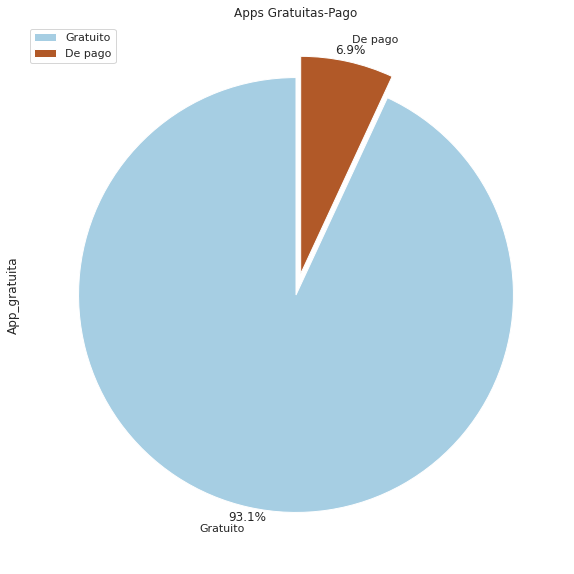

In [ ]:
import matplotlib.pyplot as plt
df_limpio['App_gratuita']=df_limpio['App_gratuita'].replace(0,'De pago')
df_limpio['App_gratuita']=df_limpio['App_gratuita'].replace(1,'Gratuito')
df_limpio['App_gratuita'].value_counts().plot.pie(figsize=(10, 10),
                             title='Apps Gratuitas-Pago',
                             startangle=90,
                             autopct='%1.1f%%',
                             pctdistance=1.05,
                             colormap='Paired',
                             explode=(0,.1))
plt.legend(loc='upper left')

Aquí podemos ver que el 93,1% de las aplicaciones son gratuitas y el 6.9% las aplicaciones se pagan en Google Play Store, por lo que podemos decir que la mayoría las aplicaciones son gratuitas en Google Play Store.

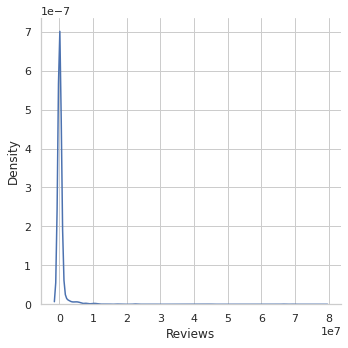

In [ ]:
sns.displot(df_limpio.Reviews, kind="kde")


La distribución anterior está claramente sesgada. Las aplicaciones con muy pocas reseñas lograron fácilmente obtener calificaciones de 5.0 que pueden ser engañosas.
Así que filtremos los que mas de 5000000 reseñas. Estas aplicaciones filtradas son las que realmente tienen una calificación de 5.0.

No. de aplicaciones que tienen 5.0 de Rating con suficientes reseñas:  230


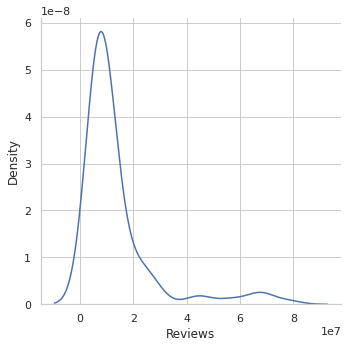

In [ ]:
df_full = df_limpio[df_limpio.Reviews > 5000000]
print("No. de aplicaciones que tienen 5.0 de Rating con suficientes reseñas: ",df_full.App.count())
sns.displot(df_full.Reviews, kind="kde")

In [ ]:
df_important = df_limpio.loc[:,['Reviews', 'Instalaciones_minimas_estimadas', 'Rating', 'Exito_app']]
df_important.head()

,Reviews,Instalaciones_minimas_estimadas,Rating,Exito_app
0,159,10000,4.100,1
1,967,500000,3.900,0
2,87510,5000000,4.700,1
3,215644,50000000,4.500,1
4,967,100000,4.300,1


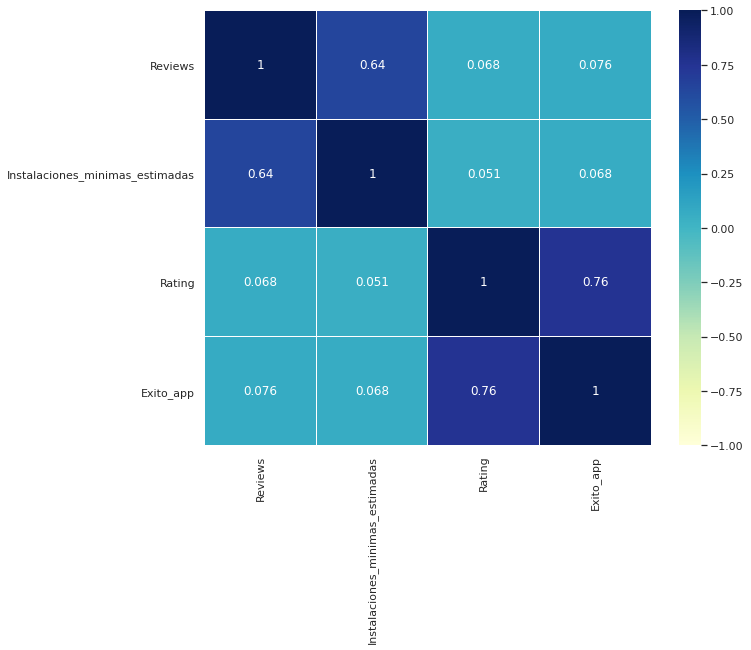

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_important.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap="YlGnBu")

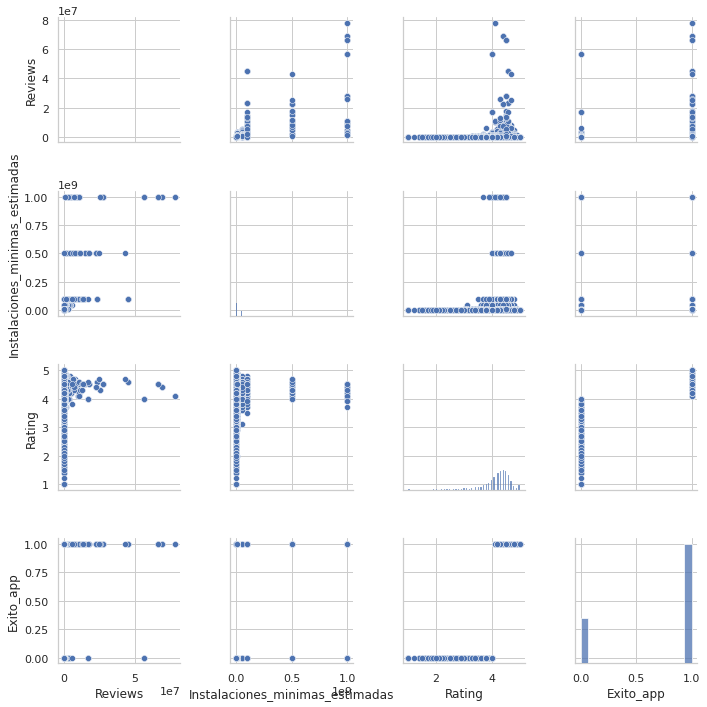

In [ ]:
sns.pairplot(data=df_important, palette="bright") 

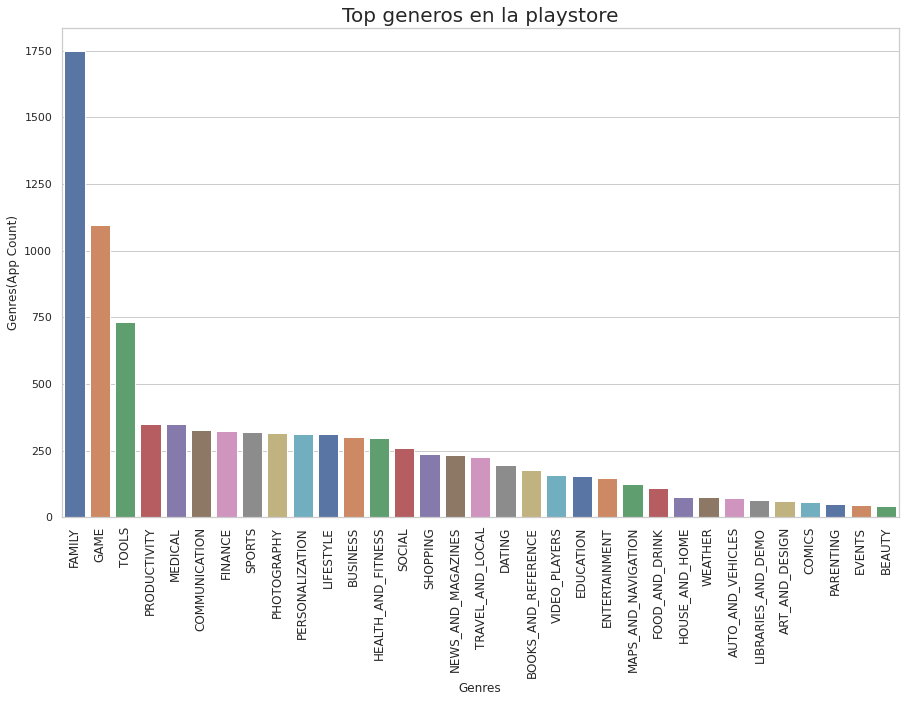

In [ ]:
top_apps_generos = df_limpio['Categoria'].value_counts()
generoX = []
generoY = []

for i in range(len(top_apps_generos)):
    generoX.append(top_apps_generos.index[i])
    generoY.append(top_apps_generos[i])

plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=generoX,y=generoY,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top generos en la playstore", fontsize = 20);

Con el gráfico anterior podemos notar que aplicación enfócados en la categoría **Family** predominan en nuestro dataset, nos da indicio para pensa que la mayoría de las aplicaciones desarrolladas son destinadas a un público de todas las edades y donde todos puedan utlizar la apps móvil.

Le siguen las aplicaciones destinadas a video juegos y herramientas. La categoría de aplicaciones menos representadas son las enfocadas a calendarios y organiezación (_events_) y enfócadas a belleza.

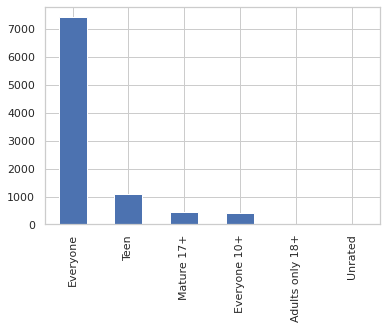

In [ ]:
df['Rating_del_contenido'].value_counts().plot.bar()

Concordando con lo anterior, la mayoría del contenido en estas aplicaciones esta enfocado a todo público y solo un poqueño sector diseña aplicaciones para adultos y gente adulta.

### **Procesamiento de lenguaje natural.**

Para este espacio, usaremos la columna de los titulos. Lo anterior, ya que algunos de estos nombres contienen stop words, podríamos simplificar los titulos con las palabras clave que nos interesan que sean representativo de la aplicación.



In [ ]:
!pip install nltk
!pip install --upgrade pip
!python -m nltk.downloader all
import nltk
import string

     |████████████████████████████████| 1.6MB 3.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import twitter_samples 
from nltk.tokenize import word_tokenize  


Creamos una función para procesar los titulos de las aplicaciones, de esta mánera quitamos stopwords y obtenemos las palabras significantes por su léxico.

In [ ]:
def process_text(text):
    """
    Input:
        text: una cadena 
    Output:
        text_clean: una lista de palabras conteniendo el text ya procesado

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'#', '', text)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    text_tokens = tokenizer.tokenize(text)
    text_clean = []
    for word in text_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation):          
            stem_word = stemmer.stem(word) 
            text_clean.append(stem_word)
    clean=''
    for i in text_clean:
      clean+=i
      clean+= ' '

    return clean

Observamos que obtenemos los titulos procesados con las características antes descritas

In [ ]:
procesado=pd.DataFrame(map(process_text,df['App']))
procesado

,0
0,photo editor candi camera grid scrapbook
1,color book moana
2,u launcher lite – free live cool theme hide app
3,sketch draw paint
4,pixel draw number art color book
...,...
9361,fr calcul
9362,sya 9a maroc fr
9363,fr mike schmitz audio teach
9364,scp foundat db fr nn5n


Ahora, agrupamos el top 50 de los valores más repetidos para poder visualizar que algunas de las aplicaciones pueden ser complementos de otras, por ejemplo Roblox que es una aplicación popular, obtuvimos 9 aplicaciones que existen en el dataset referente a este videojuego movil

In [ ]:
pd.DataFrame(procesado.value_counts().head(50))

,0
0,
roblox,9
,8
cb sport app score news stat watch live,8
duolingo learn languag free,7
espn,7
8 ball pool,7
candi crush saga,7
rich,6
subway surfer,6


### **Regresión Logística.**

A partir de nuestro dataset limpio en donde tenemos la columna de Exito_App con un 1 si es exitosa o un 0 si no lo fue, se decidió incorporar un análisis de regresión logística para que a partir de un conjunto de prueba, identificar si es posible clasificar el resto y predecir si son exitosas o no. De esta forma lo primero que se realizó fue observar el data set para retirar aquellas variables categóricas que no serán de utilidad:

In [ ]:
df_limpio.head(2)

,App,Categoria,Reviews,Tamanio_MB,Instalaciones_minimas_estimadas,App_gratuita,App_pago,Precio,Rating_del_contenido,Ultimo_updated,Anio_ultimo_updated,Version_actual,Version_Android,Rating,Exito_app
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.000,10000,Gratuito,0,0.000,Everyone,"January 7, 2018",2018,1.0.0,4.0.3 and up,4.100,1
1,Coloring book moana,ART_AND_DESIGN,967,14.000,500000,Gratuito,0,0.000,Everyone,"January 15, 2018",2018,2.0.0,4.0.3 and up,3.900,0


Posteriormente se construyeron los vectores X (con variables independientes numéricas) y _y_ como el vector con la variable dependiente binaria que nos arroja si la app es un éxito o no.

In [ ]:
X = df_limpio.drop(columns=['Exito_app', 'App', 'Categoria', 'App_gratuita', 'App_pago', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated', 'Version_actual', 'Version_Android', 'Rating'])
y = df_limpio['Exito_app']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Construyendo nuestros conjuntos de entrenamiento y de prueba a partir de una muestra de prueba del 30%:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

Aplicando la regresión logística:

In [ ]:
logreg = LogisticRegression(random_state = 234)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediciendo para nuestro conjunto de prueba se obtuvo lo siguiente:

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

Finalmente, al ver cuantos elementos del conjunto de prueba se clasificaron de forma correcta se obtuvo el 72.5% de exactitud al implementar el algoritmo de regresión logística:

In [ ]:
logreg.score(X_test, y_test)

0.7195729537366548

Aparentemente el resultado de la exactitud es muy buen en el set de prueba, pero veamos por un momento los datos presentes:
 

In [ ]:
print('Proporción de registros por clase en el set de prueba (%): ')
y_test.value_counts()

Proporción de registros por clase en el set de prueba (%): 


1    2018
0     792
Name: Exito_app, dtype: int64

Notamos que los datos estan desvalanceados hacía la clase 1. Este modelo de regresión logística predice en la mayoría de las ocasiones la clase más representada, por lo que la _exactitud_ obtenida anteriormnete es una métrica de desempeño engañosa, en este caso, ya que solo 16 registros (de los 792 registros de la clase negativa) se predijeron de manera correcta, esto quiere decir que un modelo de logístico no puede separar las clase de buena manera, y tiende a predecir la clase más representada.


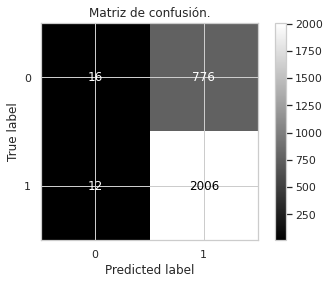

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

plot_confusion_matrix(logreg, X_test, y_test, values_format='.6g', cmap = 'gray')
plt.title('Matriz de confusión.')
plt.show();

Lo mencionado anteriormente se puede notar también con la métrica _AUC (Area under the curve)_, por lo que el rendimiento de este modelo es muy pobre en este conjunto de datos. 

In [ ]:
print('Metrica AUC: ', roc_auc_score(y_test, y_pred))

Metrica AUC:  0.5071277692685027


A pesar de que el 71.9% representa un buen parámetro de exactitud, este puede ser engañoso, y debemos de recurir a técnicas más avanzadas de Machine Learning; sin embargo, funciona como un buen parámetro de comparación a futuro, lo cual nos servirá para identificar si otros algoritmos y técnicas, así como replanteamientos del problema se comportan de mejor o peor manera al predecir el éxito o fracaso de una app.